# BME 4670 - HW 1

### Load in packages

In [1]:
import numpy as np
import pandas as pd

### a) Get data from URL and read into dataframe 

In [2]:
# URL for Post-Operative Patient Data Set 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'

# read into Pandas dataframe, no header provided
df = pd.read_csv(url,header=None)

# create header labels
df.columns = ['L-CORE','L-SURF','L-O2','L-BP','SURF-STBL','CORE-STBL',
'BP-STBL','COMFORT','Decision']

In [25]:
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,5,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


#### In this dataset, Attribute 8 (comfort) has 3 missing values. These instances will be eliminated as a preprocessing step before moving further. 

In [9]:
df = df[df.COMFORT != '?']

# Change COMFORT values to integer for plotting
df[['COMFORT']] = df[['COMFORT']].astype(int)

### b) Plot relationship between "comfort" and categorical features
#### A swarmplot was chosen to plot the data in this dataset. Since the categorical variables only indicate a certain range of values (eg. a high L-CORE would be an internal temperature greater than 37 degrees C) and the precise value is unknown, swarmplots were used to more clearly visualize the distribution for each given categorical variable with respect to comfort. 

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

#### Comfort vs. L-CORE (Internal Temperature)

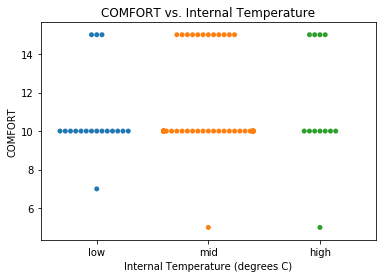

In [32]:
ax = sns.swarmplot(x=df['L-CORE'], y=df['COMFORT'],order=["low", "mid","high"])
plt.ylabel("COMFORT");
plt.xlabel("Internal Temperature (degrees C)");
plt.title("COMFORT vs. Internal Temperature");

# high (> 37), mid (>= 36 and <= 37), low (< 36)

#### The plot shows that most patients were evaluated to have a mid range internal temperature (i.e. between 36 and 37 degrees C). Fewer patients overall had a low internal temperature, and even fewer were recorded as high. Regardless of whether the patient had a low, mid, or high internal temperature, most rated their comfort as a '10.' Interestingly, for those that were either on the higher or lower side, there doesn't seem to be a greater incidence of a lower comfort compared to the mid temperature case. In fact, 7 patients for the extreme cases still rated their comfort as being higher than '10.' 

#### Comfort vs. L-SURF (Surface Temperature)

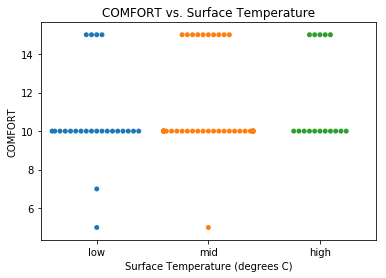

In [33]:
ax = sns.swarmplot(x=df['L-SURF'], y=df['COMFORT'],order=["low", "mid","high"])
plt.ylabel("COMFORT");
plt.xlabel("Surface Temperature (degrees C)");
plt.title("COMFORT vs. Surface Temperature");

# high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)

#### Most patients had a low or mid range surface temperature, and for all cases a majority of patients rated their comfort as a '10.' 2 patients that had a lower surface temperature tended to have a lower comfort level, and 1 patient also had a comfort level below 10. Those with a higher surface temperature also did not rate their comfort as below 10, which may have been expected as it is outside the normal range.

#### Comfort vs. L-O2 (Oxygen Saturation)

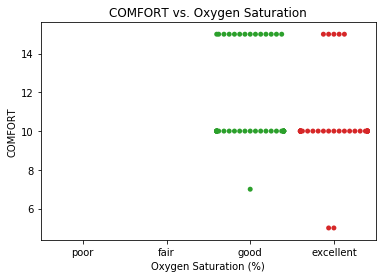

In [44]:
ax = sns.swarmplot(x=df['L-O2'], y=df['COMFORT'],order=["poor","fair","good","excellent"])
plt.ylabel("COMFORT");
plt.xlabel("Oxygen Saturation (%)");
plt.title("COMFORT vs. Oxygen Saturation");

# excellent (>= 98), good (>= 90 and < 98), fair (>= 80 and < 90), poor (< 80)

#### The plot shows that no patients had a "poor" or "fair" oxygen saturation rating, defined as being below 90%. Most patients had a "good" O2 saturation (between 90% and 98%). However, two patients that had an "excellent" O2 saturation rated their comfort level much lower than all others, therefore these may represent outliers in the data, though it's also unknown whether their O2 saturation may be related to their discomfort. 

#### Comfort vs. L-BP (Last Measurement of Blood Pressure)

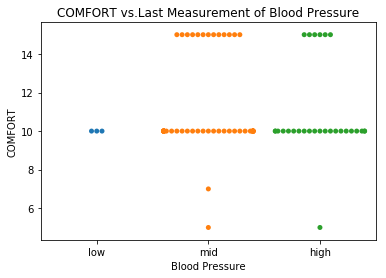

In [45]:
ax = sns.swarmplot(x=df['L-BP'], y=df['COMFORT'],order=["low", "mid","high"])
plt.ylabel("COMFORT");
plt.xlabel("Blood Pressure");
plt.title("COMFORT vs. Last Measurement of Blood Pressure");

# high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)

#### A majority of patients had a mid-range blood pressure (130/90), and only three were determined to be in the low category (below 90/70). Regardless of low blood pressure, these patients did not rate their comfort as abnormally low or below 10. However two patients in the  mid range did rate their comfort below 10 and 1 patient with a high blood pressure did so as well. As with the other variables, it cannot be easily determined from the graph whether their blood pressure may have been the cause or related to their discomfort.

#### Comfort vs. SURF-STBL (Stability of Patient's Surface Temperature)

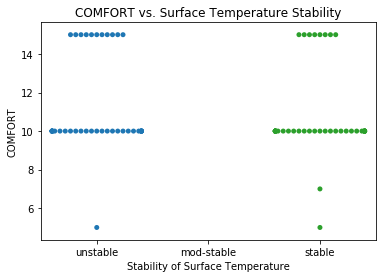

In [47]:
ax = sns.swarmplot(x=df['SURF-STBL'], y=df['COMFORT'],order=["unstable","mod-stable","stable"])
plt.ylabel("COMFORT");
plt.xlabel("Stability of Surface Temperature");
plt.title("COMFORT vs. Surface Temperature Stability");

#### No patients were determined to have a moderately stable surface temperature. A majority were categorized as unstable, thought there is no significant indication from the graph that these patients tend to rate their comfort lower. Though the patients may have a fluctuating surface temperature, it could be determined that this does not necessarily mean they experience greater degrees of discomfort. 

#### Comfort vs. CORE-STBL (Stability of Patient's Core Temperature)

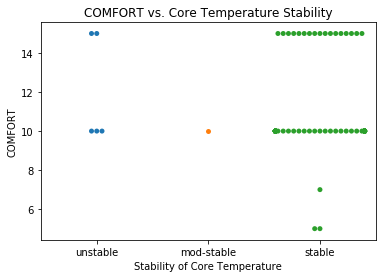

In [48]:
ax = sns.swarmplot(x=df['CORE-STBL'], y=df['COMFORT'],order=["unstable","mod-stable","stable"])
plt.ylabel("COMFORT");
plt.xlabel("Stability of Core Temperature");
plt.title("COMFORT vs. Core Temperature Stability");

#### A considerable majority of patients were categorized as have a stable core temperature, though three patients in this cateogory also rated their comfort level below average. Patients with lower core temperature stability also did not rate their comfort any lower than 10, though two patients with marked unstable did rate their comfort as being above 10. Only one patient was determined to have a moderately stable core temperature.

#### Comfort vs. BP-STBL (Stability of Patient's Blood Pressure)

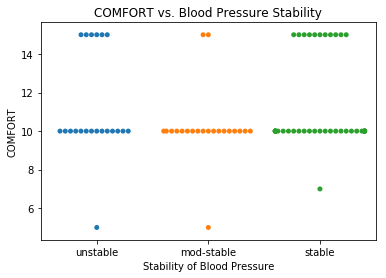

In [49]:
ax = sns.swarmplot(x=df['BP-STBL'], y=df['COMFORT'],order=["unstable","mod-stable","stable"])
plt.ylabel("COMFORT");
plt.xlabel("Stability of Blood Pressure");
plt.title("COMFORT vs. Blood Pressure Stability");

#### Patients with a stable blood pressure seemed to experience a greater amount of comfort overall. Those with lower blood pressure stability also did not seem to significantly rate their comfort lower or higher, though more patients marked unstable rated their comfort above 10. A few marked as unstable or moderately stable rated their comfort quite low, though there doesn't appear to be a significant relationship based on their blood pressure stability. 

#### Comfort vs. ADM-DECS (Discharge Decision)

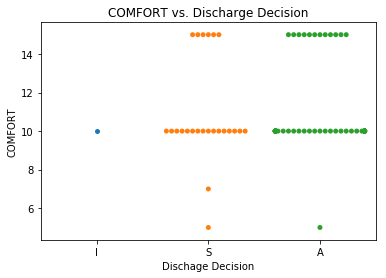

In [51]:
ax = sns.swarmplot(x=df['Decision'], y=df['COMFORT'],order=["I","S","A"])
plt.ylabel("COMFORT");
plt.xlabel("Dischage Decision");
plt.title("COMFORT vs. Discharge Decision");

#   I (patient sent to Intensive Care Unit), 
#   S (patient prepared to go home),
#   A (patient sent to general hospital floor)

#### Most patients were sent to the general hospital floor and the remaining were sent home, save for one patient who was admitted to the ICU. Though that patient did not seem to experience an extreme amount of discomfort, other variables seem to show an abnormal physiological condition and that the patient would need to be under intensive care. 